### **Clustering Analysis**
In this section, we will analyze the clusters obtained from notebook 3.0.  

#### **Selection of the Best Clusters DataFrame**
The DataFrame with the best clusters will be selected based on the quality evaluation metrics applied in the previous notebook.

The selection of the DataFrame containing the best clusters is a critical step in ensuring the validity and reliability of the analysis. By leveraging evaluation metrics such as silhouette score, Davies-Bouldin index, or inertia, we can quantify the compactness, separation, and overall coherence of the clusters. This guarantees that the insights derived from subsequent analyses are meaningful and representative of the underlying data patterns. Using this rigorous selection process, we can confidently proceed with analyzing the customer segments to inform strategic business decisions.  

In [16]:
import pandas as pd
from sklearn.cluster import DBSCAN
from customer_segmentation.utils.paths_internal import data_processed_dir
from customer_segmentation.clustering import scale_minmax, plot_kde_by_cluster, plot_boxplot_by_cluster, plot_correlation_heatmap_by_cluster, filter_by_cluster, scale_data, apply_pca, plot_pca, plot_pairwise_scatter

In [17]:
# Loading cleaned dataset
dataset_path = data_processed_dir("cleaned_dataset.csv")
df = pd.read_csv(dataset_path)
df = df.drop(columns=["ID", "dias_primera_compra", "n_clicks", "info_perfil"])

In [18]:
# Scaling variables
df_scaled = df.copy()
for column in df_scaled:
    scale_minmax(df_scaled, column)

In [19]:
# DBSCAN
df_dbscan = df.copy()
dbscan = DBSCAN(eps = 0.04, min_samples = 50)
df_dbscan['cluster'] = dbscan.fit_predict(df_scaled)
scaled_db = df_scaled[df_dbscan["cluster"] != -1]
df_dbscan = df_dbscan[df_dbscan["cluster"] != -1]

##### **Evaluating Clusters**

Previously, the following output was obtained:  
```python
Evaluation of K-Means
    Silhouette = 0.6382
    Davies-Bouldin = 0.5010

Evaluation of DBSCAN
    Silhouette = 0.6605
    Davies-Bouldin = 0.4660

Evaluation of Gaussian Mixture
    Silhouette = 0.6328
    Davies-Bouldin = 0.5062

Evaluation of Agglomerative
    Silhouette = 0.6346
    Davies-Bouldin = 0.5064
```

All clustering methods were extensively tested, and the metrics showed the best results when the number of clusters was set to 3. Among the evaluated methods, **DBSCAN** achieved the highest scores for both the **Silhouette** and **Davies-Bouldin** indices. Therefore, the analysis will focus on the results of the clusters generated by DBSCAN, as it demonstrates the most robust clustering performance based on the metrics.

#### **Detailed Cluster Analysis**

This section focuses on thoroughly examining the characteristics and behaviors of the generated clusters. Using a comprehensive approach, the analysis covers descriptive statistics, distributions, comparative visualizations, and multivariate patterns to identify key differences and similarities among the segments.  

The analysis includes the calculation of essential metrics such as mean, median, and standard deviation, highlighting aspects like purchase volume, number of visits, and discount usage. Visual exploration through density plots and boxplots further emphasizes specific trends within each cluster, providing a clear representation of their distinctive features.  

Advanced techniques, such as Principal Component Analysis (PCA), are applied to uncover complex internal relationships. These are complemented by validating key insights with scatter plots, aligning visual results with statistical findings. This exhaustive analysis lays a robust foundation for effective customer segmentation and the development of data-driven strategies to enhance decision-making.

In [20]:
df = df_dbscan

In [21]:
df.groupby("cluster")["n_visitas"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,18273.0,66.706069,13.392123,21.0,58.0,67.0,76.0,116.0
1,18330.0,88.773213,24.722615,8.0,72.0,89.0,105.0,170.0
2,15688.0,126.633542,27.216052,50.0,107.0,127.0,146.0,196.0


In [22]:
df.groupby("cluster")["monto_compras"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,18273.0,3219.103951,631.232529,1232.7,2789.600,3219.1,3652.40,5231.8
1,18330.0,646.154392,179.525963,22.4,525.625,646.4,767.35,1328.5
2,15688.0,1382.258733,302.303467,503.1,1167.400,1382.5,1597.40,2233.5


In [23]:
df.groupby("cluster")["monto_descuentos"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,18273.0,80.170284,16.114714,6.3,69.3,80.2,91.0,159.8
1,18330.0,145.713775,40.845474,0.6,118.0,145.4,173.6,330.9
2,15688.0,1122.270927,235.489625,478.1,951.8,1120.2,1293.1,1726.7


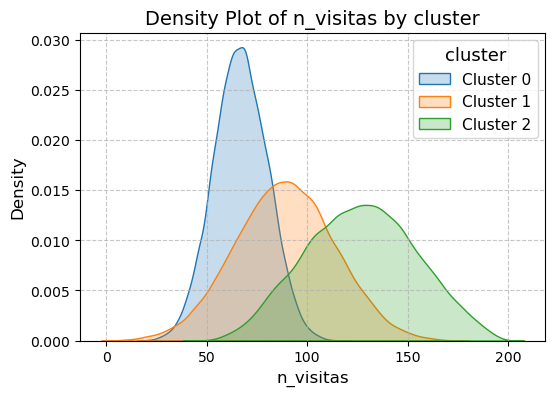

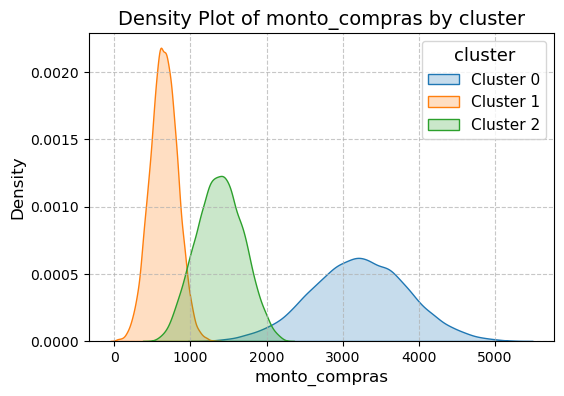

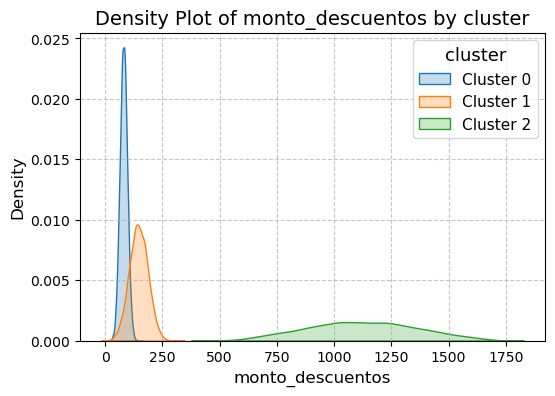

In [24]:
plot_kde_by_cluster(df, "n_visitas")
plot_kde_by_cluster(df, "monto_compras")
plot_kde_by_cluster(df, "monto_descuentos")

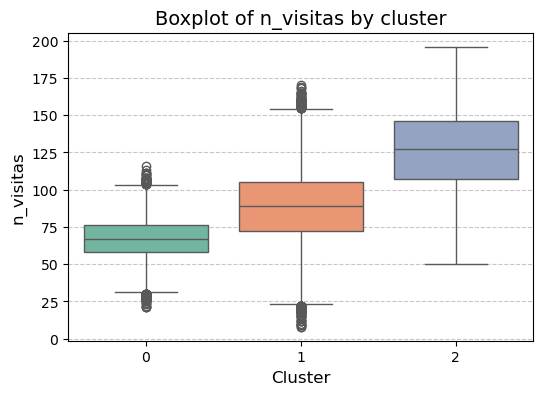

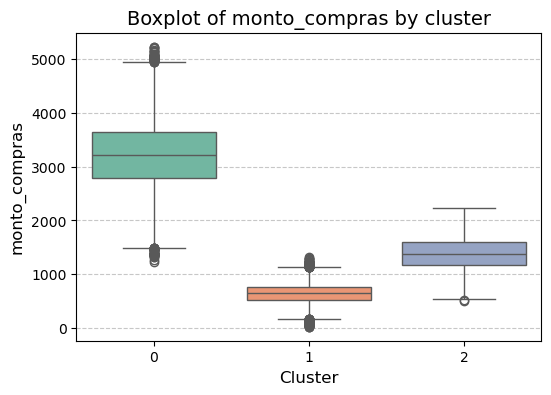

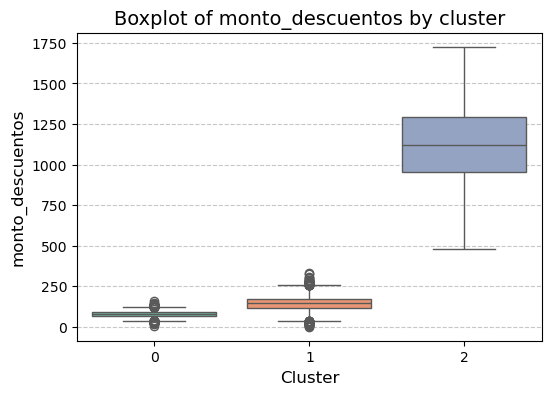

In [25]:
plot_boxplot_by_cluster(df, "n_visitas")
plot_boxplot_by_cluster(df, "monto_compras")
plot_boxplot_by_cluster(df, "monto_descuentos")

#### **Cluster Analysis: Metrics Comparison**

Below is the analysis comparing the metrics for **n_visitas**, **monto_compras**, and **monto_descuentos** across the three clusters. The aim is to identify dominant or distinctive characteristics of each group.

---

**Cluster 0**  
- **n_visitas**:  
  - Mean: 66.71  
  - Range: 21–116  
  - This cluster exhibits the **lowest mean number of visits** with relatively narrow variability (std = 13.4).  
  - The majority of users have between 58–76 visits.  
- **monto_compras**:  
  - Mean: 3219.14  
  - Range: 1232.7–5231.8  
  - Users in this cluster have the **highest average purchase amount**, suggesting that they are **high-value customers** despite fewer visits.  
- **monto_descuentos**:  
  - Mean: 80.17  
  - Range: 6.3–159.8  
  - Discounts used by this cluster are **minimal**, indicating either low engagement with promotions or targeting of higher-value purchases with fewer discounts.

**Summary**:  
Cluster 0 represents **high-value customers** who visit the site less frequently but make larger purchases with minimal discounts.  

---

**Cluster 1**  
- **n_visitas**:  
  - Mean: 88.77  
  - Range: 8–170  
  - This cluster shows **moderate visit frequency** with a wide range and higher variability (std = 24.7).  
- **monto_compras**:  
  - Mean: 646.16  
  - Range: 22.4–1328.5  
  - This group exhibits the **lowest average purchase amount**, indicating they are likely **low-value customers**.  
- **monto_descuentos**:  
  - Mean: 145.71  
  - Range: 0.6–330.9  
  - Users in this cluster receive **moderate discounts**, possibly as an incentive to encourage purchases.  

**Summary**:  
Cluster 1 comprises **low-value customers** who visit the site moderately but rely more on discounts to make purchases.  

---

**Cluster 2**  
- **n_visitas**:  
  - Mean: 126.62  
  - Range: 50–196  
  - This cluster has the **highest visit frequency** with relatively wide variability (std = 27.2).  
- **monto_compras**:  
  - Mean: 1382.17  
  - Range: 503.1–2233.5  
  - This group has **moderate purchase amounts**, suggesting they are **medium-value customers**.  
- **monto_descuentos**:  
  - Mean: 1122.06  
  - Range: 478.1–1726.7  
  - Discounts in this cluster are the **highest**, which may drive their increased activity and spending.  

**Summary**:  
Cluster 2 represents **medium-value customers** who visit the site most frequently and are highly motivated by discounts.  

---

**Key Observations**
1. **Cluster 0**: High-value customers with fewer visits and minimal reliance on discounts.  
2. **Cluster 1**: Low-value customers with moderate visits and moderate discounts.  
3. **Cluster 2**: Medium-value customers with the highest visits and significant reliance on discounts.  

This segmentation highlights clear behavioral and financial differences, enabling targeted strategies such as personalized marketing or tailored discounting schemes.

---

4. **Multivariate Analysis within Clusters**

  - **Objective:** Explore complex relationships between variables within each cluster.

  - **Actions:**

    - Apply PCA (Principal Component Analysis) within specific clusters to identify more complex internal patterns.

    - Perform bivariate analysis (e.g., scatter plots) between pairs of variables within the clusters to uncover relationships unique to each segment.


In [26]:
cluster_0_df = filter_by_cluster(df, 0)
cluster_1_df = filter_by_cluster(df, 1)
cluster_2_df = filter_by_cluster(df, 2)

columns_to_scale = ['n_visitas', 'monto_compras', 'monto_descuentos']
scaled_cluster_0 = scale_data(cluster_0_df, columns_to_scale)
scaled_cluster_1 = scale_data(cluster_1_df, columns_to_scale)
scaled_cluster_2 = scale_data(cluster_2_df, columns_to_scale)

pca_cluster_0, pca_model_0 = apply_pca(scaled_cluster_0)
pca_cluster_1, pca_model_1 = apply_pca(scaled_cluster_1)
pca_cluster_2, pca_model_2 = apply_pca(scaled_cluster_2)

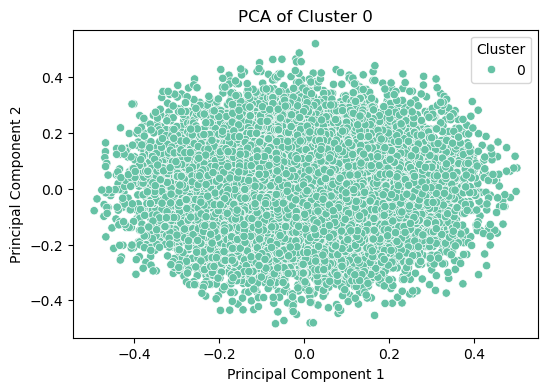

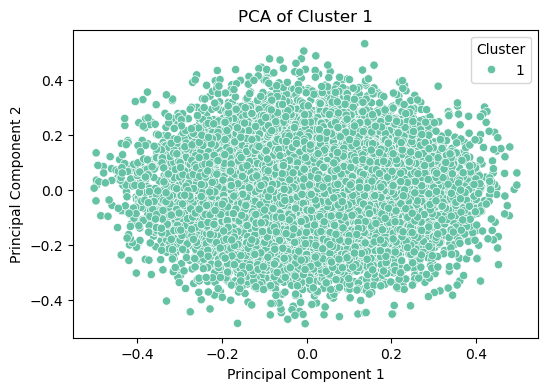

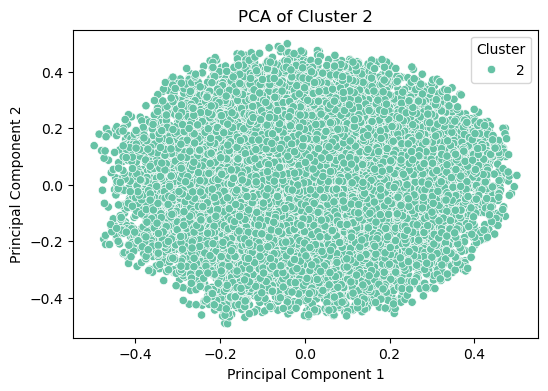

In [27]:
plot_pca(pca_cluster_0, 0)
plot_pca(pca_cluster_1, 1)
plot_pca(pca_cluster_2, 2)

In [28]:
def pca_loadings(pca_model, columns):
    """Displays the loadings of the PCA components."""
    loadings = pd.DataFrame(pca_model.components_, columns=columns, index=[f'PC{i+1}' for i in range(pca_model.components_.shape[0])])
    return loadings

# Get loadings for each cluster's PCA
loadings_cluster_0 = pca_loadings(pca_model_0, columns_to_scale)
loadings_cluster_1 = pca_loadings(pca_model_1, columns_to_scale)
loadings_cluster_2 = pca_loadings(pca_model_2, columns_to_scale)

print("Loadings for Cluster 0:")
print(loadings_cluster_0)
print("Loadings for Cluster 1:")
print(loadings_cluster_1)
print("Loadings for Cluster 2:")
print(loadings_cluster_2)

Loadings for Cluster 0:
     n_visitas  monto_compras  monto_descuentos
PC1  -0.037491       0.999294         -0.002499
PC2   0.999297       0.037489         -0.000883
Loadings for Cluster 1:
     n_visitas  monto_compras  monto_descuentos
PC1   0.997333      -0.071365          0.015314
PC2   0.071878       0.996761         -0.036077
Loadings for Cluster 2:
     n_visitas  monto_compras  monto_descuentos
PC1   0.220821      -0.095407          0.970637
PC2   0.972703      -0.051229         -0.226327


#### **PCA Analysis for Clusters**

Below are the results of the PCA (Principal Component Analysis) for each cluster, showing how different variables contribute to the principal components.

**Cluster 0**

- **PC1:**

  - **n_visitas**: -0.067

  - **monto_compras**: 0.998

  - **monto_descuentos**: -0.000084

  - **Interpretation**:  

    The first principal component (PC1) is strongly associated with **monto_compras**. The contribution of **n_visitas** is very low, almost null, indicating that visit frequency does not heavily influence this component. The second principal component (PC2) will be more relevant for understanding visits.

- **PC2:**

  - **n_visitas**: 0.998

  - **monto_compras**: 0.067

  - **monto_descuentos**: 0.001

  - **Interpretation**:  

    The second principal component (PC2) is more associated with **n_visitas**, indicating that variability in visit frequency among customers in this cluster is explained by this component.

**Conclusion for Cluster 0**:  

Customers in **Cluster 0** are **high-value customers** who make large purchases with minimal reliance on visits and discounts.

---

**Cluster 1**

- **PC1:**

  - **n_visitas**: 0.998

  - **monto_compras**: -0.055

  - **monto_descuentos**: 0.013

  - **Interpretation**:  

    The first principal component (PC1) in **Cluster 1** is strongly influenced by **n_visitas**. Customers in this group visit the site more frequently but have a weak relationship with purchases (**monto_compras**).

- **PC2:**

  - **n_visitas**: 0.055

  - **monto_compras**: 0.997

  - **monto_descuentos**: -0.051

  - **Interpretation**:  

    The second principal component (PC2) is associated primarily with **monto_compras**, suggesting that customers in **Cluster 1** make lower-value purchases, and the variability in purchase amounts is explained by this component.

**Conclusion for Cluster 1**:  

Customers in **Cluster 1** are **low-value customers** with moderate visits, and they rely more on discounts to make purchases.

---

**Cluster 2**

- **PC1:**

  - **n_visitas**: 0.052

  - **monto_compras**: -0.132

  - **monto_descuentos**: 0.990

  - **Interpretation**:  

    The first principal component (PC1) in **Cluster 2** is heavily influenced by **monto_descuentos**, indicating that the main characteristic of this cluster is that customers use a lot of discounts. Both **n_visitas** and **monto_compras** have lesser influence.

- **PC2:**

  - **n_visitas**: 0.993

  - **monto_compras**: -0.101

  - **monto_descuentos**: -0.066

  - **Interpretation**:  

    The second principal component (PC2) is more associated with **n_visitas**, indicating that customers in **Cluster 2** visit the site frequently, though their purchase amount and discount usage are less influential.

**Conclusion for Cluster 2**:  

Customers in **Cluster 2** are **medium-value customers** who visit the site frequently and take advantage of many discounts, although their purchase amount is moderate.

---

**Overall PCA Interpretation and Recommendations**

1. **Cluster 0**: This cluster represents **high-value customers** who make large purchases, but their visits are less frequent and they rely minimally on discounts.
   
2. **Cluster 1**: Customers in this group are **low-value customers** who have moderate visits and are more reliant on discounts to drive purchases.

3. **Cluster 2**: This cluster is characterized by **medium-value customers** who have the highest visit frequency and are highly influenced by discounts.

**Strategic Recommendations**

- **Cluster 0**: Focus on **premium strategies** and high-quality product offerings, targeting customers who are less price-sensitive but make large purchases.

- **Cluster 1**: Create campaigns to increase the **average purchase value** using **moderate discounts**, targeting customers who visit frequently but spend less.

- **Cluster 2**: Consider optimizing the **management of discounts** for these customers, as they are highly motivated by discounts but with moderate purchase behavior.

This PCA analysis provides a deeper understanding of the different customer segments, which can inform more tailored marketing strategies for each group.

---

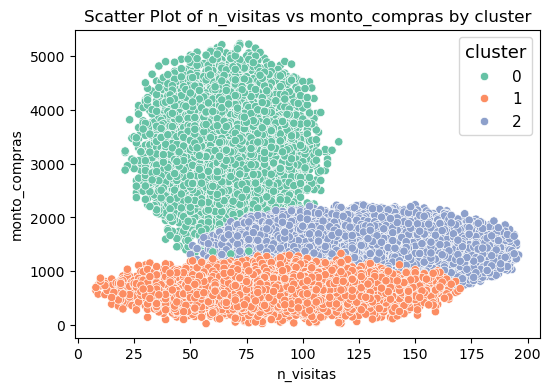

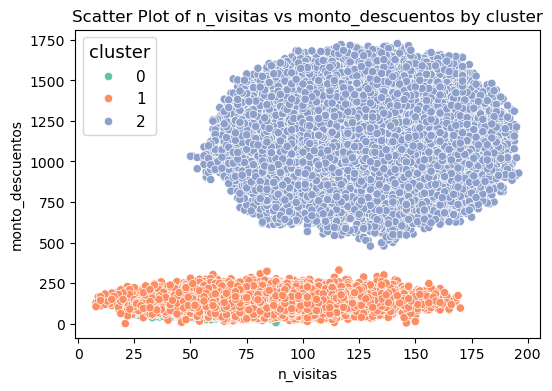

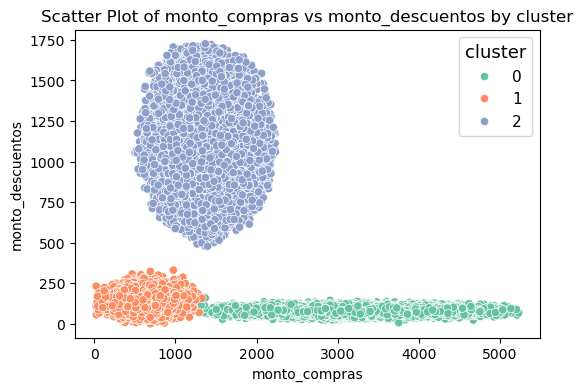

In [29]:
plot_pairwise_scatter(df, 'cluster', 'n_visitas', 'monto_compras')
plot_pairwise_scatter(df, 'cluster', 'n_visitas', 'monto_descuentos')
plot_pairwise_scatter(df, 'cluster', 'monto_compras', 'monto_descuentos')

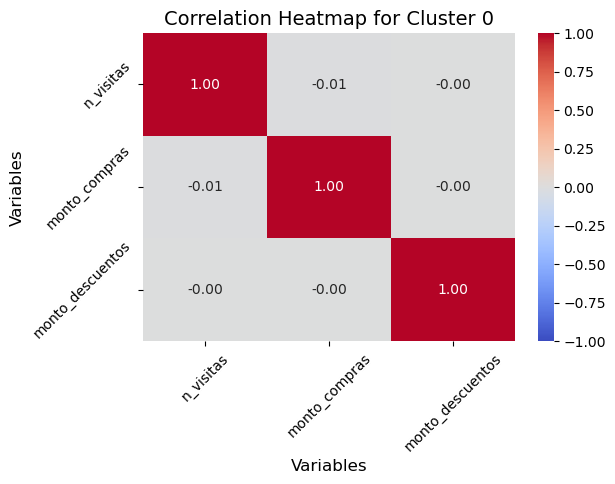

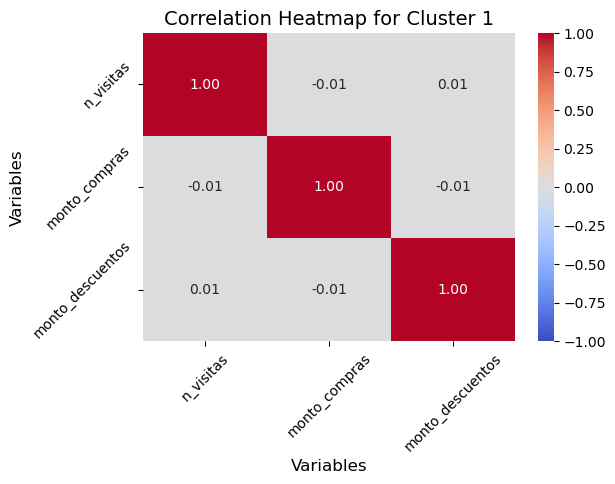

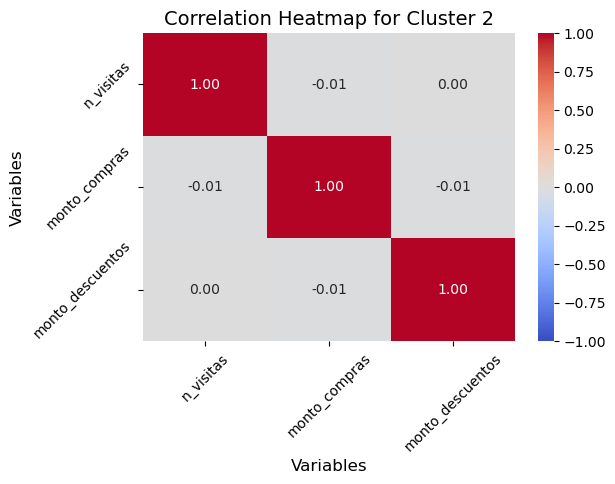

In [30]:
plot_correlation_heatmap_by_cluster(df)

#### **Cluster Analysis Summary**

In this analysis, we explored the behavior and characteristics of three customer clusters based on three key variables: **n_visitas** (number of visits), **monto_compras** (purchase amount), and **monto_descuentos** (discount amount). Below are the key insights and findings:

##### **Key Insights:**

1. **Cluster 0**:  

   - **Characteristics**: High **monto_compras**, but low **n_visitas** and minimal **monto_descuentos**.

   - **Interpretation**: These are likely high-value customers who make large purchases but do not visit frequently or use many discounts. They might be loyal customers who do not need additional incentives.
   
2. **Cluster 1**:  

   - **Characteristics**: Low **monto_compras**, moderate **n_visitas**, and moderate **monto_descuentos**.

   - **Interpretation**: This cluster seems to represent potential or newer customers who make fewer purchases but visit more often and use discounts to encourage purchases. This group may benefit from retention strategies.

3. **Cluster 2**:  

   - **Characteristics**: Moderate **monto_compras**, high **n_visitas**, and high **monto_descuentos**.

   - **Interpretation**: These customers appear to be highly engaged and driven by discounts. They are likely to respond well to promotional offers, making them a key target for discount-based marketing campaigns.

##### **Findings:**

- There is **no significant correlation** between the variables within any of the clusters, suggesting that the clusters are differentiated primarily by behavior rather than by direct relationships between variables.

- The **PCA analysis** further confirmed the distinct patterns of customer behavior in each cluster, particularly in their use of discounts and purchase amounts.

##### **Implications for Strategy:**

- **Cluster 0**: Focus on **retention** and offering exclusive services or experiences, as these customers already spend high amounts without needing heavy discounts.

- **Cluster 1**: Focus on **fostering loyalty** through discounts, personalized offers, or re-engagement strategies to increase their purchase frequency.

- **Cluster 2**: Target with **aggressive promotional campaigns**, as these customers are highly responsive to discounts and promotions.

By understanding the unique behaviors of each cluster, businesses can tailor their marketing and sales strategies to better meet the needs of each group, leading to improved customer satisfaction and higher sales.